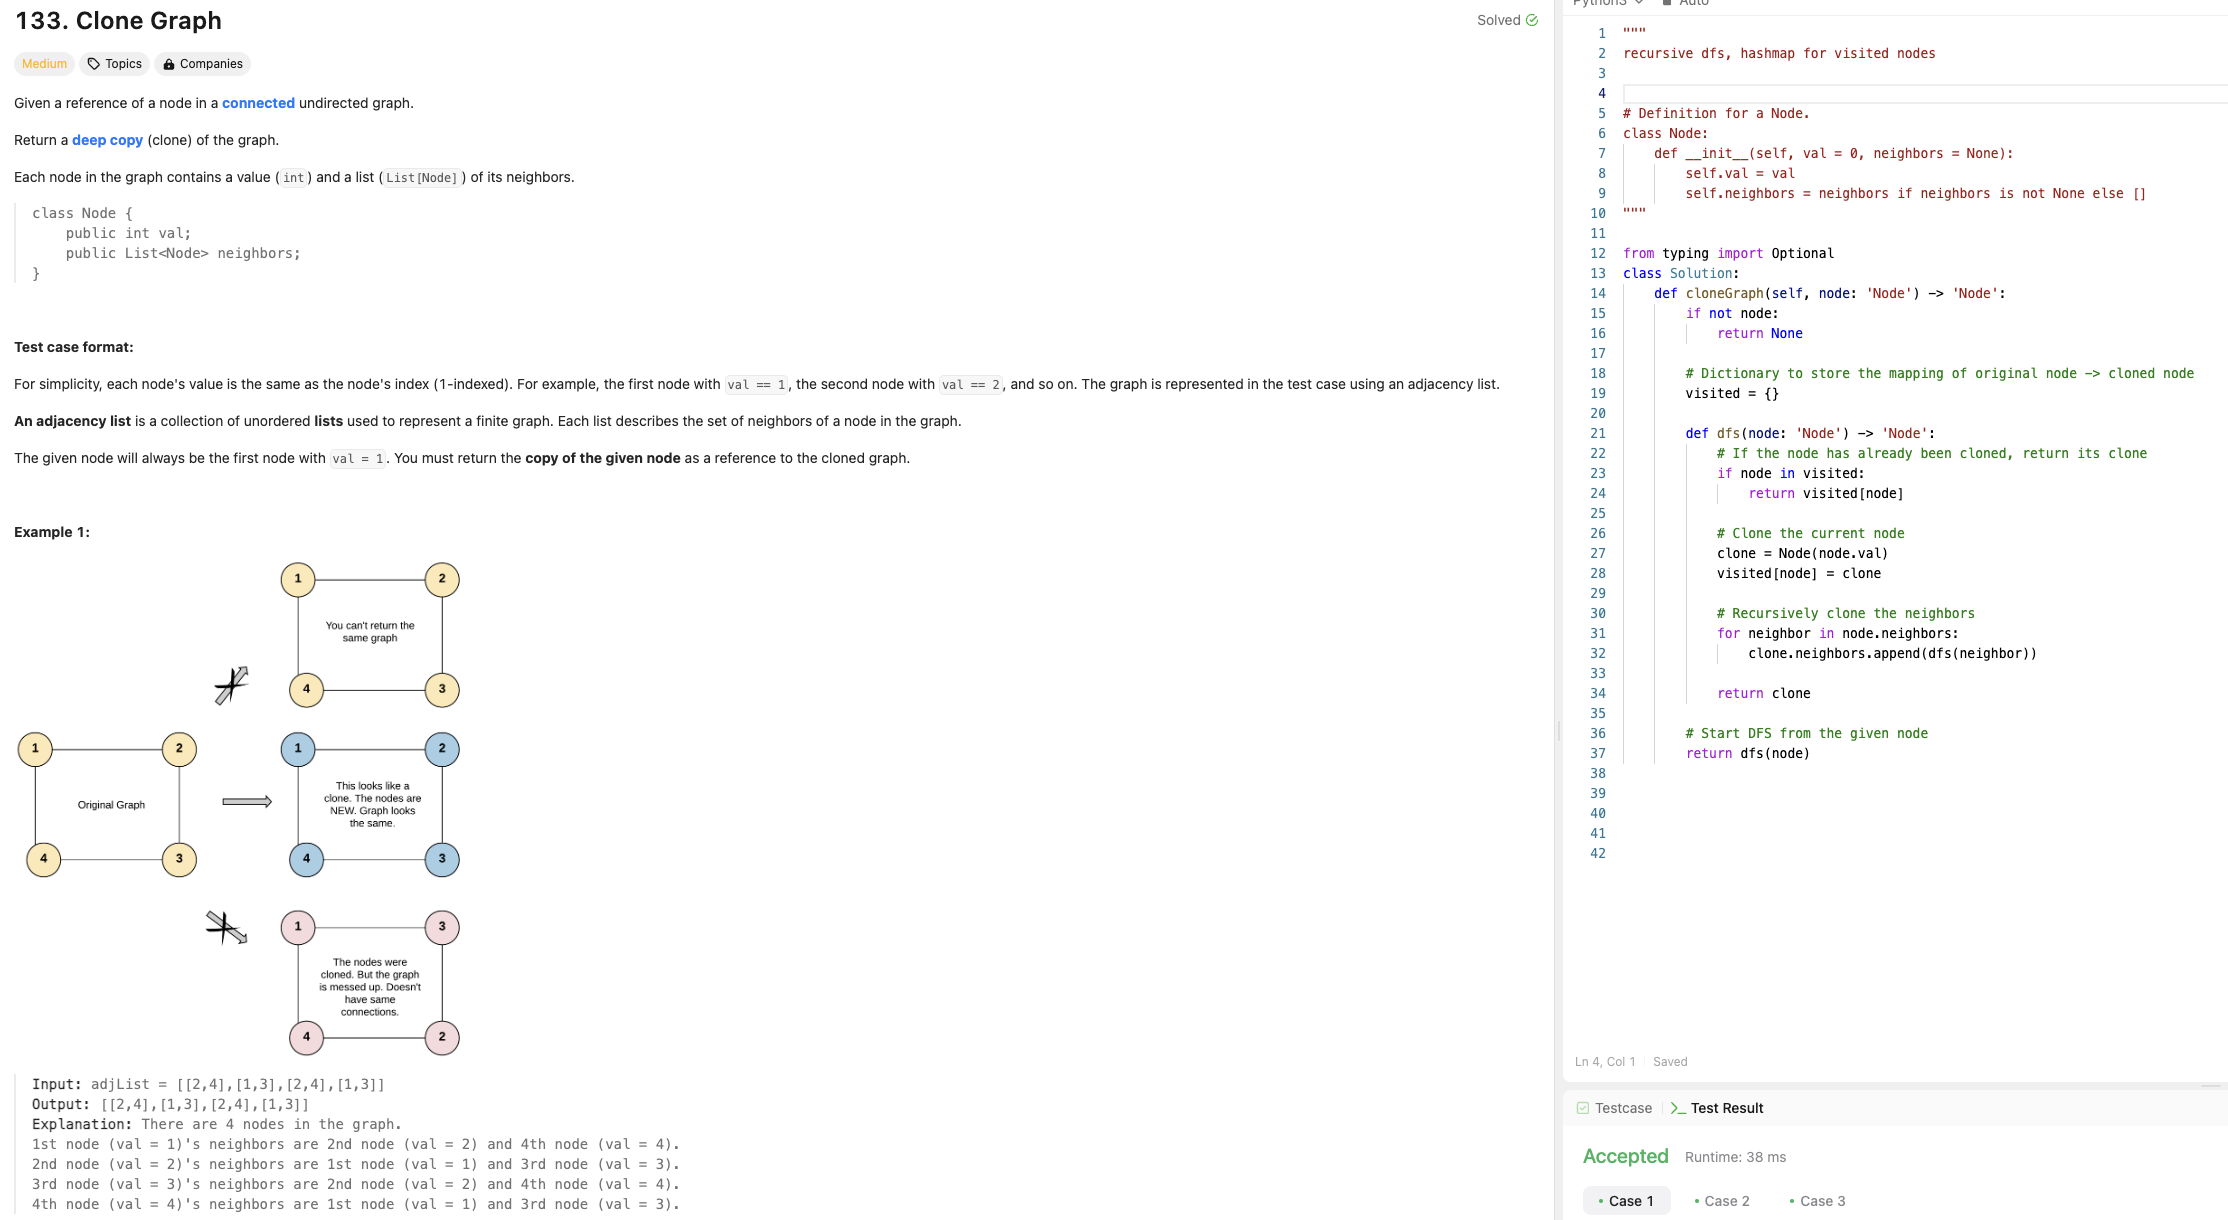

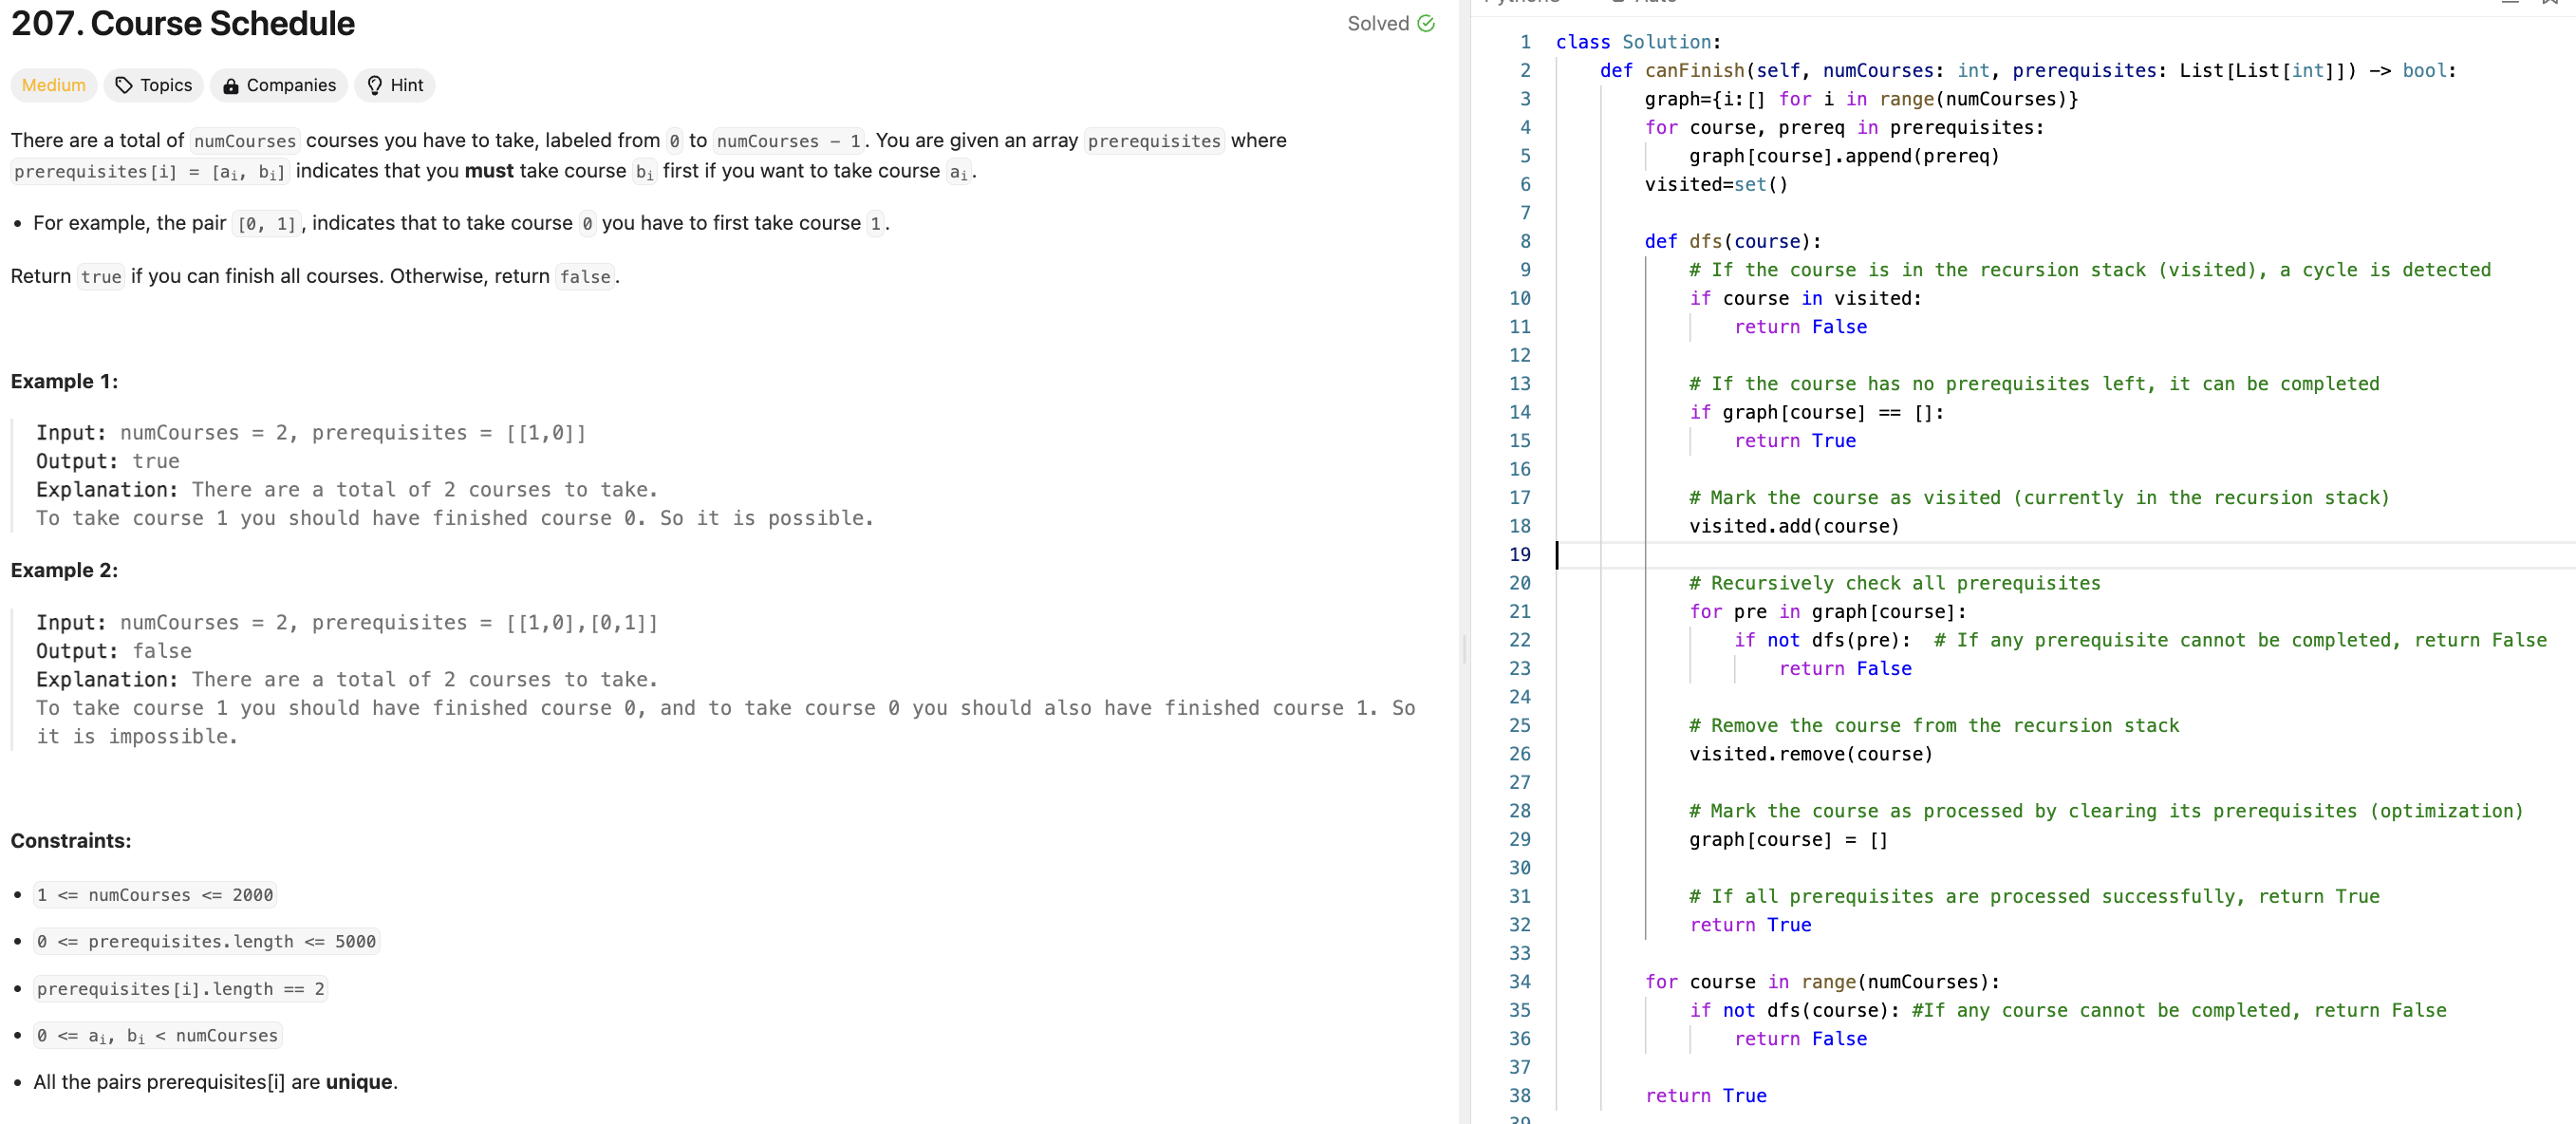

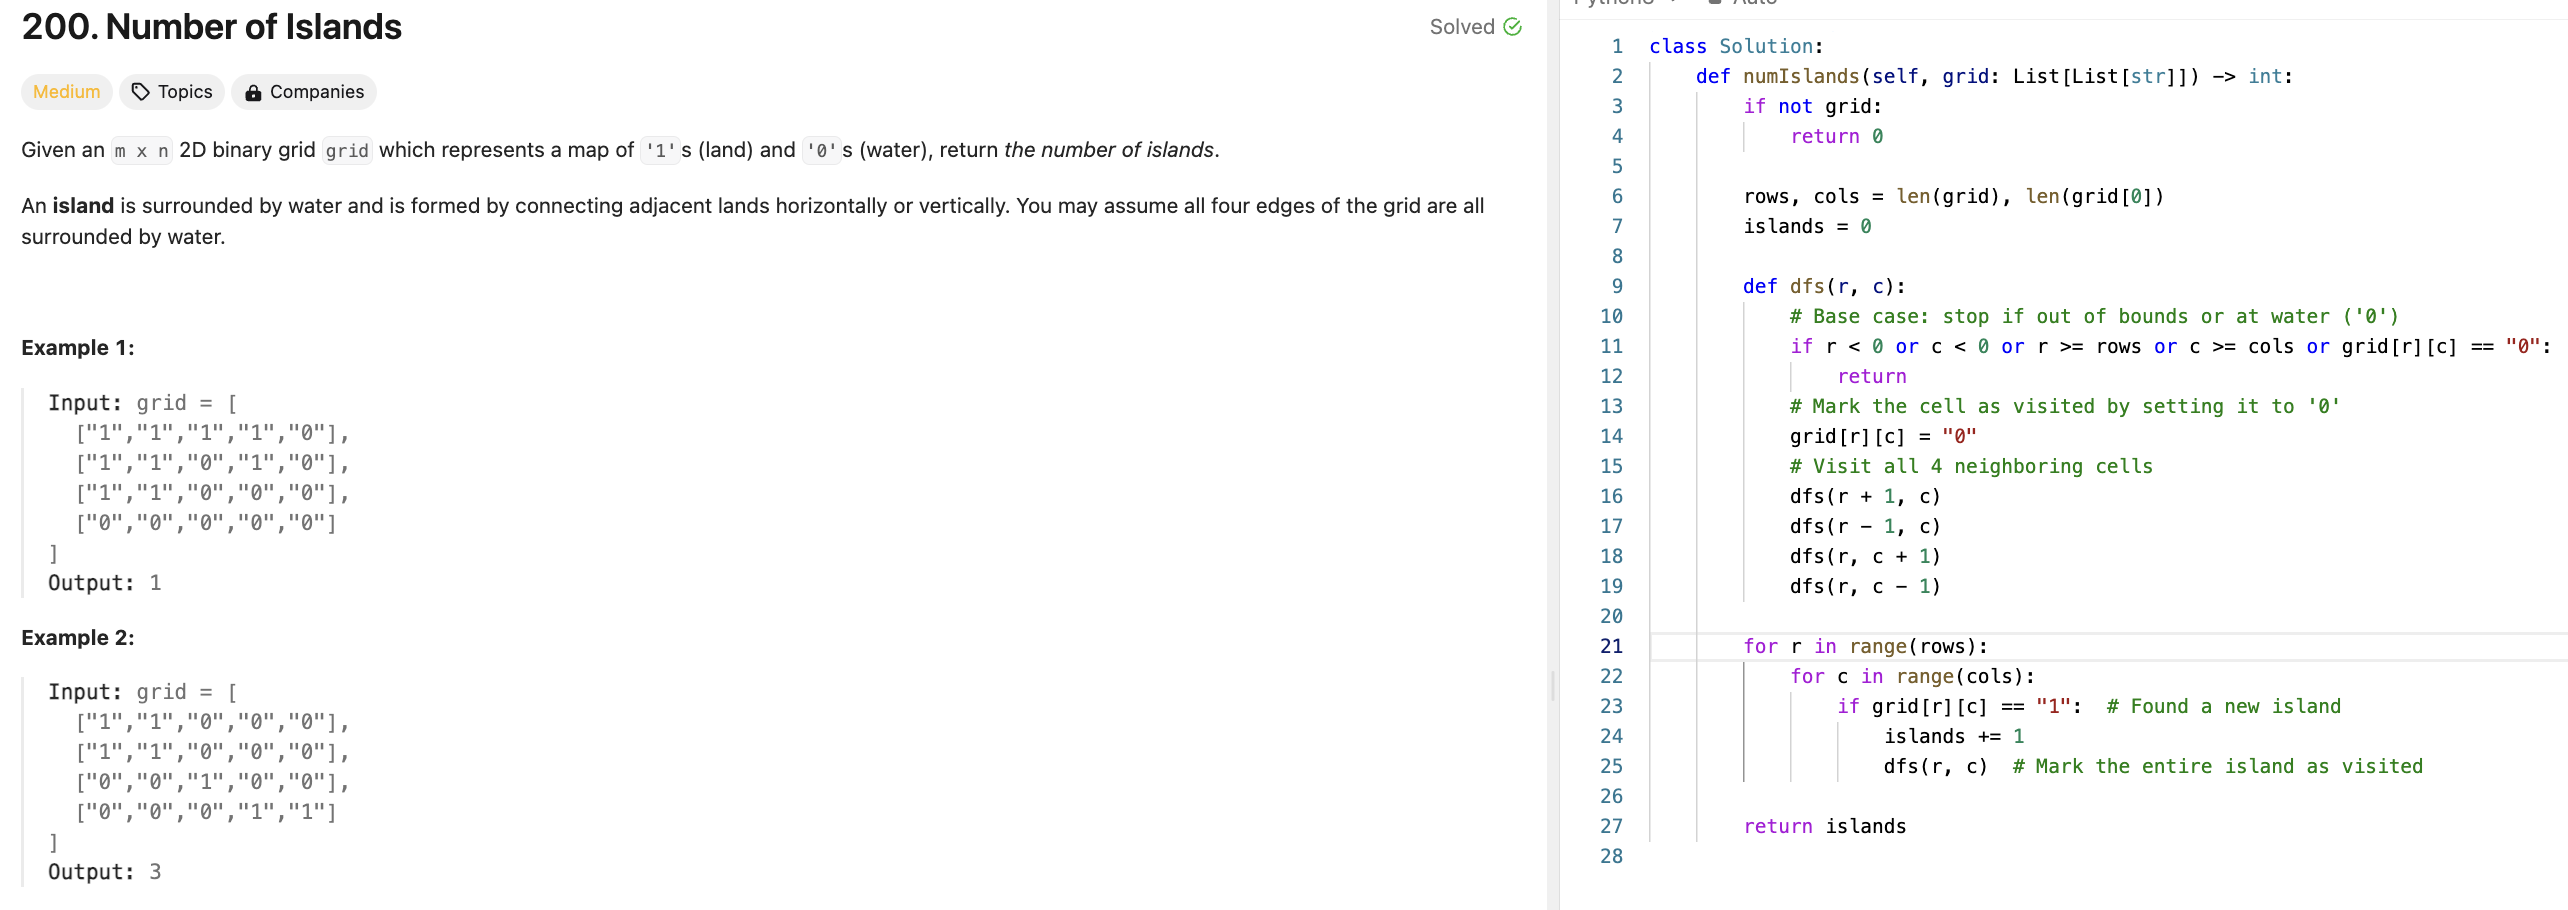

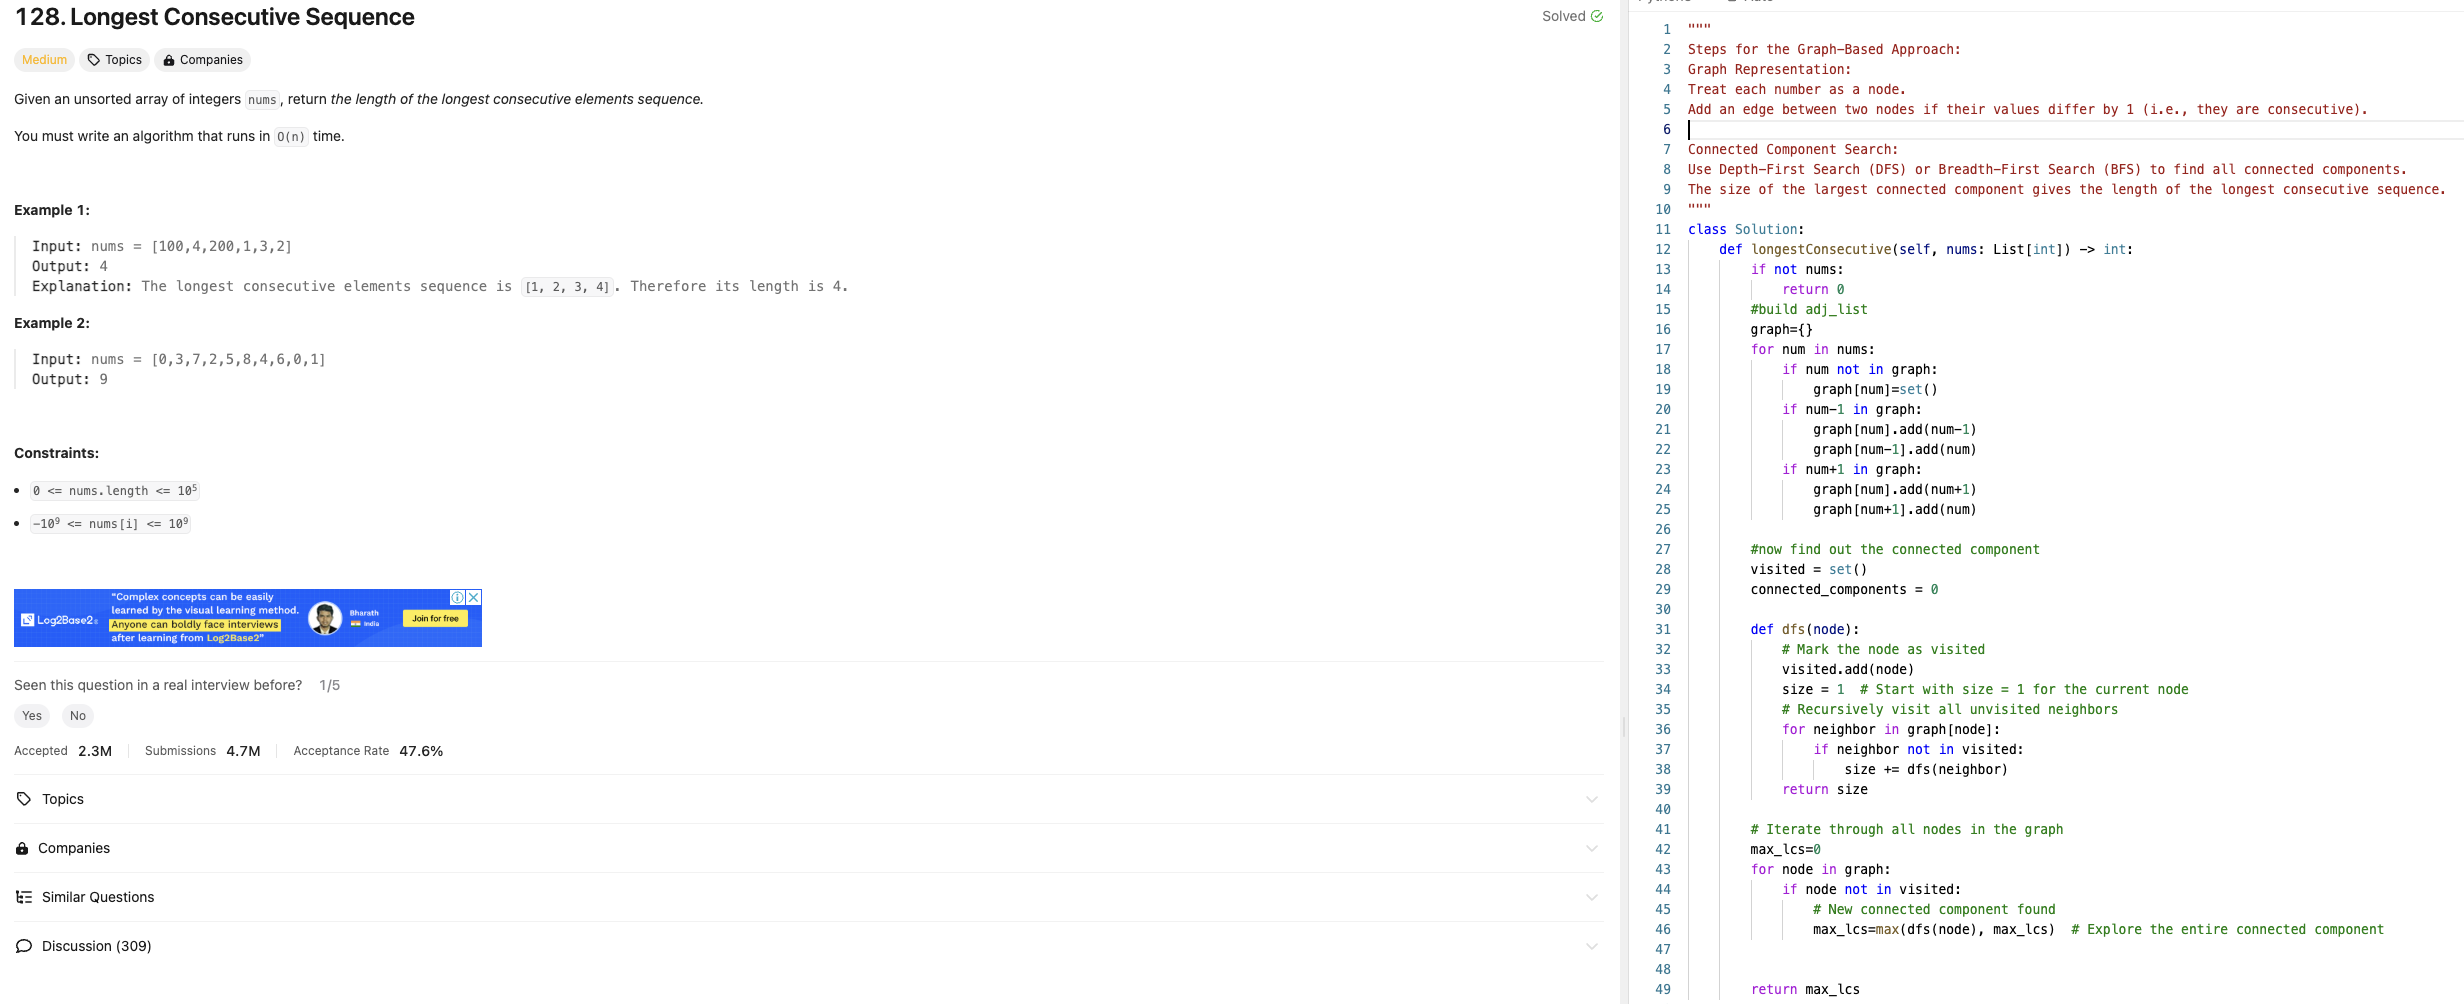

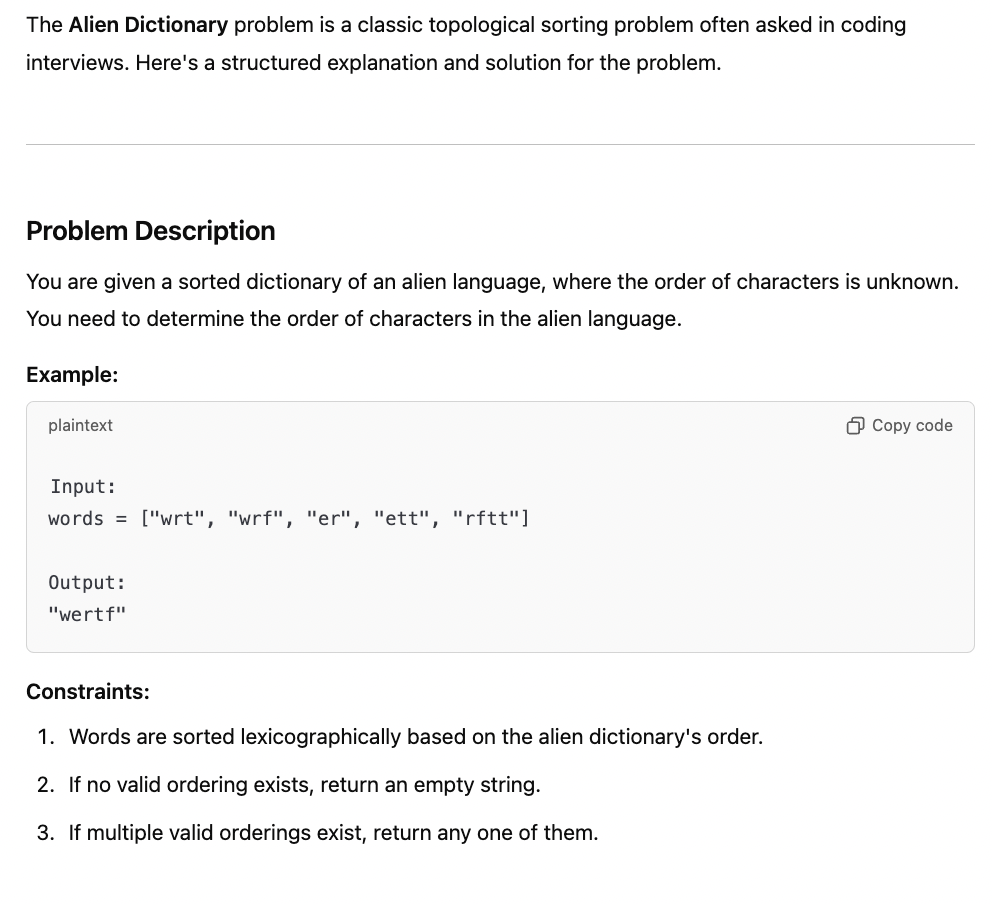


In [5]:
from collections import defaultdict
from typing import List

class Solution:
    def alienOrder(self, words: List[str]) -> str:
        # Step 1: Build the graph
        graph = defaultdict(set)
        all_chars = set()  # To keep track of all unique characters

        for word in words:
            for char in word:
                all_chars.add(char)

        # Compare adjacent words to infer edges
        for i in range(len(words) - 1):
            word1, word2 = words[i], words[i + 1]
            # Check if word2 is a prefix of word1, which is invalid
            if len(word2) < len(word1) and word1.startswith(word2):
                return ""

            # Add edges based on character mismatch
            for c1, c2 in zip(word1, word2):
                if c1 != c2:
                    graph[c1].add(c2)
                    break

        print(graph)

        # Step 2: Perform DFS to find topological order
        visited = {char: 0 for char in all_chars}  # 0 = not visited, 1 = visiting, 2 = visited
        result = []
        has_cycle = [False]  # Use a mutable variable to track cycles during recursion

        def dfs(node):
            if visited[node] == 1:  # Cycle detected
                has_cycle[0] = True
                return
            if visited[node] == 2:  # Already processed
                return

            # Mark the node as visiting
            visited[node] = 1
            for neighbor in graph[node]:
                dfs(neighbor)
                if has_cycle[0]:  # If a cycle is detected, stop further processing
                    return

            # Mark the node as visited and add to result
            visited[node] = 2
            result.append(node)

        # Start DFS from all unvisited nodes
        for char in all_chars:
            if visited[char] == 0:
                dfs(char)
                if has_cycle[0]:  # If a cycle is detected, return an empty string
                    return ""

        # Step 3: Reverse the result to get the correct topological order
        return "".join(reversed(result))


In [6]:
Solution().alienOrder(words = ["wrt", "wrf", "er", "ett", "rftt"])

defaultdict(<class 'set'>, {'t': {'f'}, 'w': {'e'}, 'r': {'t'}, 'e': {'r'}})


'wertf'

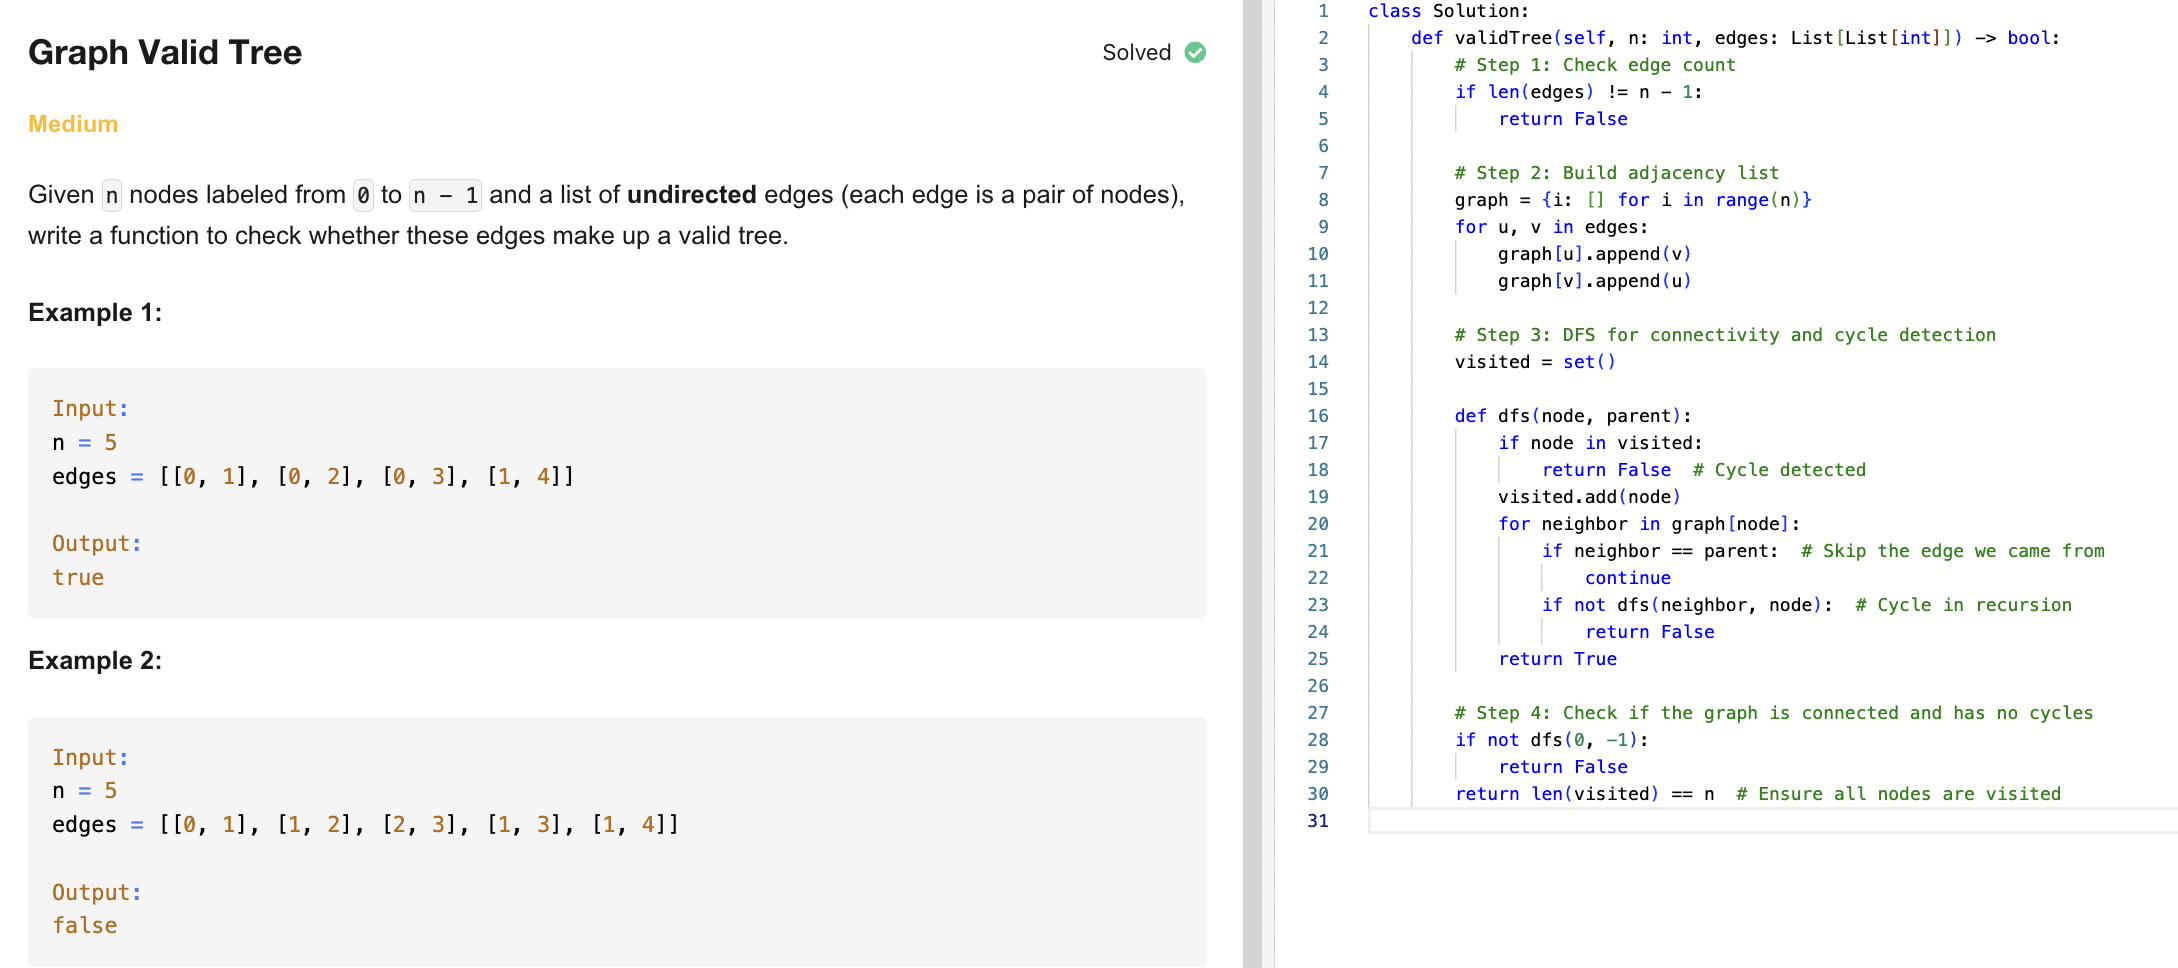

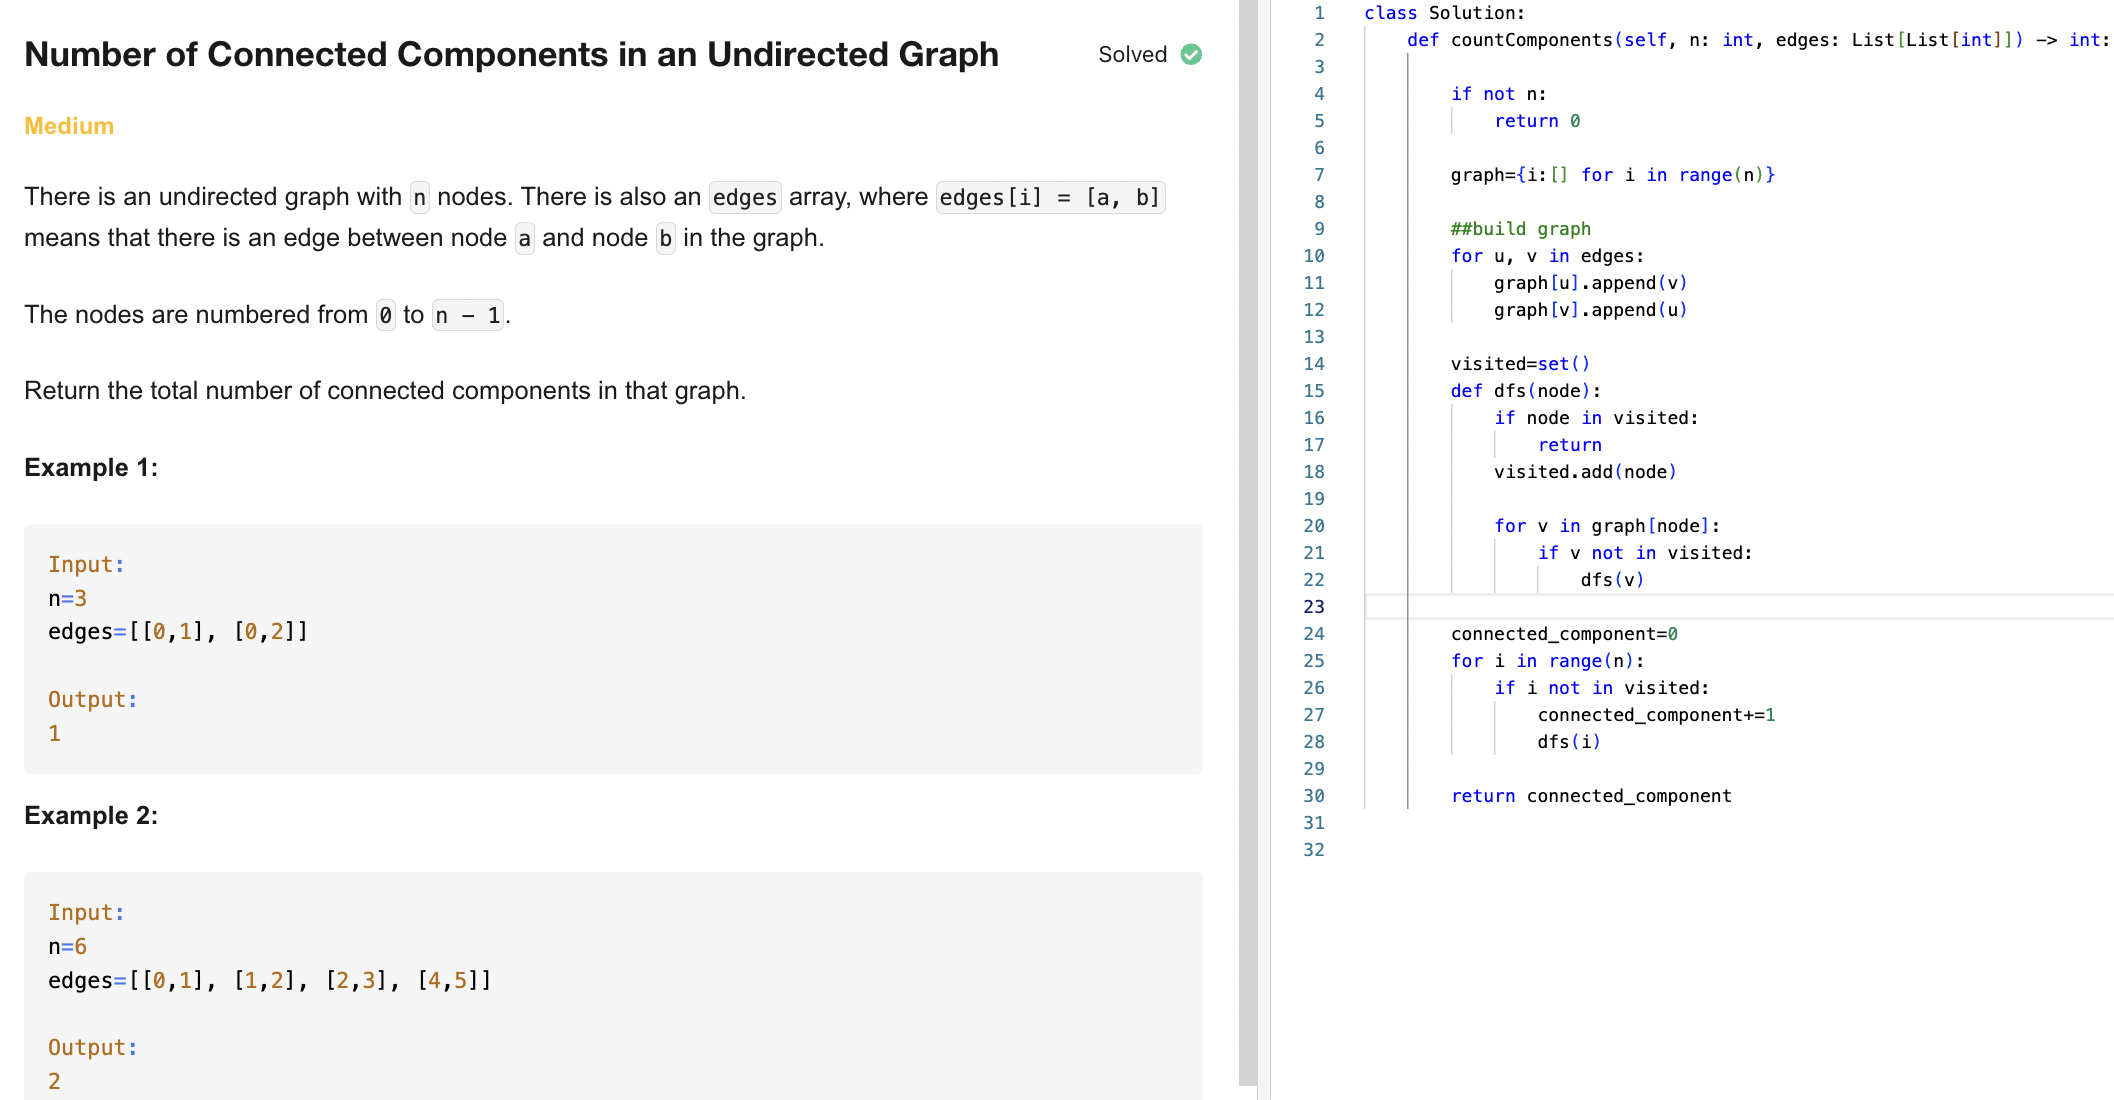